
# SMB

Chemical Equations

$$   P \xrightarrow{ \gamma} P + RNA$$

$$   P + S  \xrightarrow{k}  P + S + mRNA$$

$$   mRNA \xrightarrow{k_2} mRNA  + A$$

$$   A + P_2 \underset{k_{off}}{\overset{k_{on}}{\rightleftharpoons}}  C_1$$
  
$$RNA \xrightarrow{\delta_2} \o$$

$$A \xrightarrow{\delta} \o$$

$$C1\xrightarrow{\delta_3} \o$$

$$ ptot_2=P_2+C_1$$


ODEs

$$\frac{dA}{dt}= k_2 mRNA + k_{off} C_1 - (p_{tot2} - C_1) A k_{on}- \delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$

$$\frac{dC_1}{dt}= (p_{tot2} - C_1) k_{on} A - k_{off} C_1 - \delta_3 C_1$$

In [1]:
#Call packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import *

from scipy.integrate import odeint



# Total A

C:\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


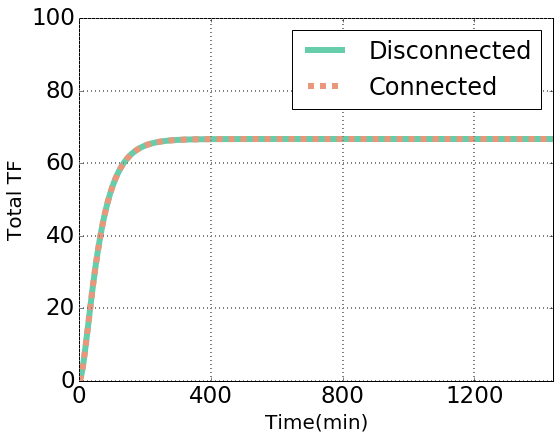

In [2]:
#Parameters

kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;
S=50.0; 
d=0.02 ;
d2=0.06; 
d3=0.02; 

k=0.09/50; 
k2=0.8; 
a=0.01;


#Downstream charges
ptot1=0
ptot2=300

#Time
t=np.arange(0,1440,0.01)

#Initial conditions
xo = [0, 0, 0]

#Disconnected system
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]

#Connected system
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)


#Graphical parameters
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

plt.xticks(np.arange(0, 1440, 400.0))

#Things to plot (Total TF)
p1, =plot(t,soln_1_50[:,0]+soln_1_50[:,2], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=6)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_zero_00_S_50_deg_weak_SMB.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in divide


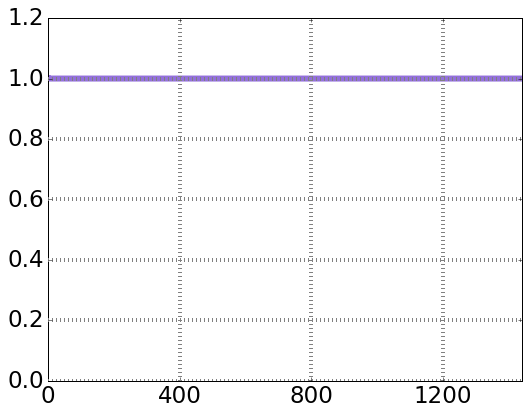

In [3]:
#Total ratio connected vs disconnected

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
plt.xticks(np.arange(0, 1440, 400.0))
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/(soln_1_50[:,0]+soln_1_50[:,2])
a1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=6)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=4, color="gray")
fig.savefig('Total_A_00_S_50_deg_ratio_weak_SMB.eps',format="eps")
show()

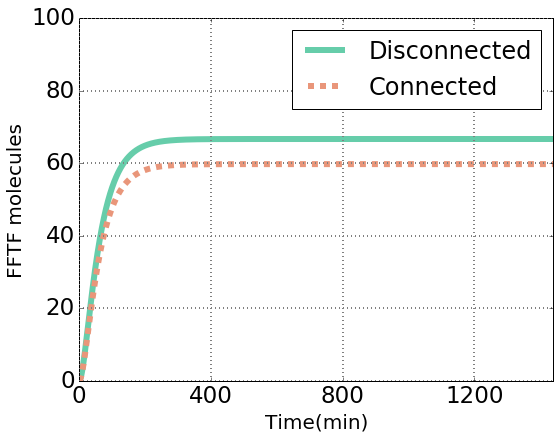

In [4]:
#Plotting only FFTF

pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=6)



xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_zero_00_S_50_deg_100_scale_monomer_bind_Det_weak.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in divide


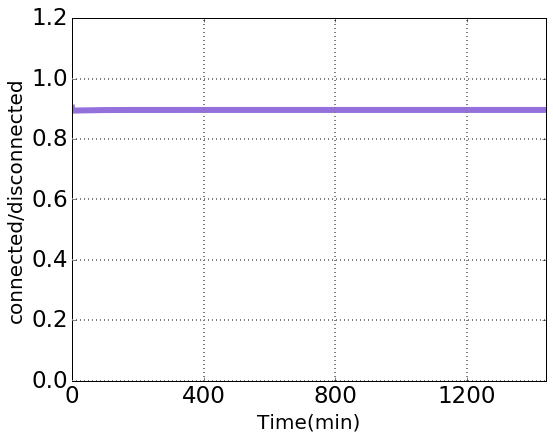

In [5]:
#FFTF ratio weak binding

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
c1=cosa
pylab.ylim([0,1.2])
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Free_A_00_S_50_deg_ratio_monomer_bind_Det_weak.eps',format="eps")
show()

# Total A with kon=100*kon

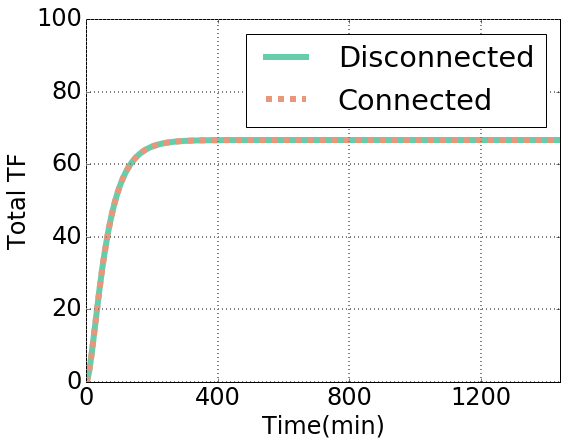

In [6]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;



from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)


xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)

matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24)
plt.xticks(np.arange(0, 1440, 400.0))
pylab.ylim([0,100])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0]+soln_1_50[:,2], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=6)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_zero_00_S_50_deg_100kon_SMB.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in divide


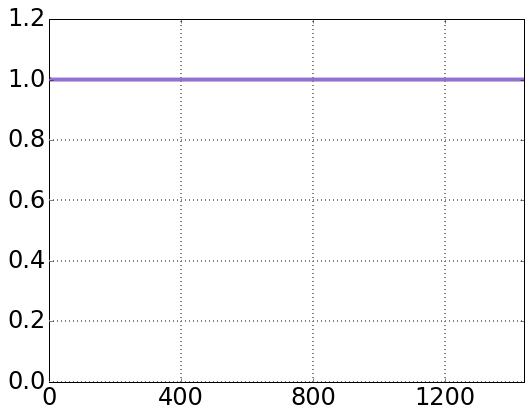

In [7]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
plt.xticks(np.arange(0, 1440, 400.0))
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/(soln_1_50[:,0]+soln_1_50[:,2])
b1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=4)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_00_S_50_deg_ratio_100kon_SMB.eps',format="eps")
show()

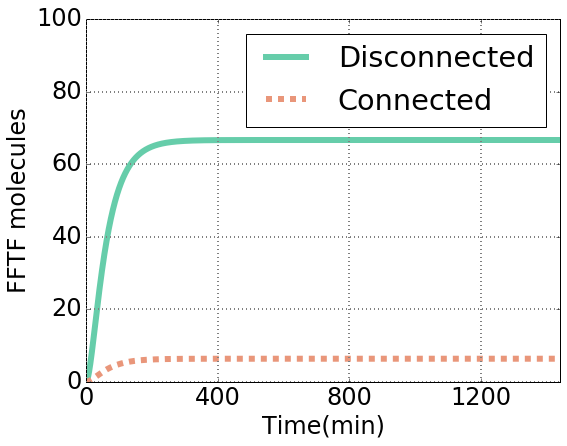

In [8]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
plt.xticks(np.arange(0, 1440, 400.0))
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=6)


xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_zero_00_S_50_deg_100kon_100_scale_monomer_bind_Det_strong_1.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


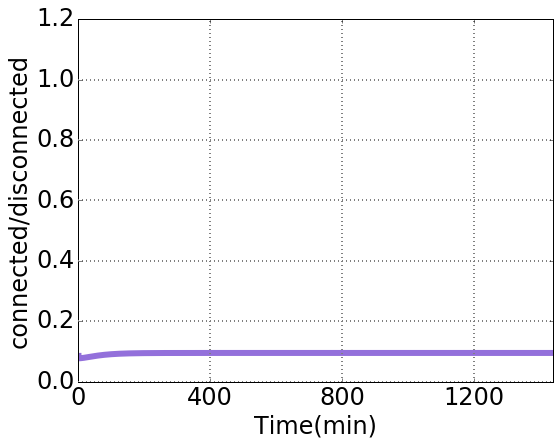

In [9]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,1.2])
f1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)
xlabel('Time(min)')
ylabel('connected/disconnected')

grid('on',lw=2, color="gray")
fig.savefig('Free_A_00_S_50_deg_ratio_100kon_monomer_bind_Det_strong_1.eps',format="eps")
show()

# Total A with koff/100

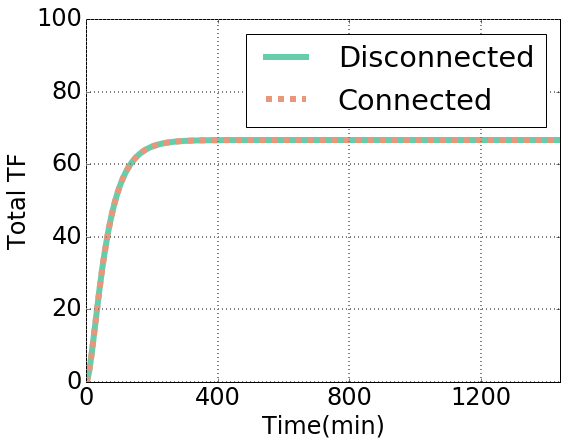

In [10]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60/100;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)

ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24)
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln_1_50[:,0]+soln_1_50[:,2], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=6)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('Total TF')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_zero_00_S_50_deg_entre100koff_SMB.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


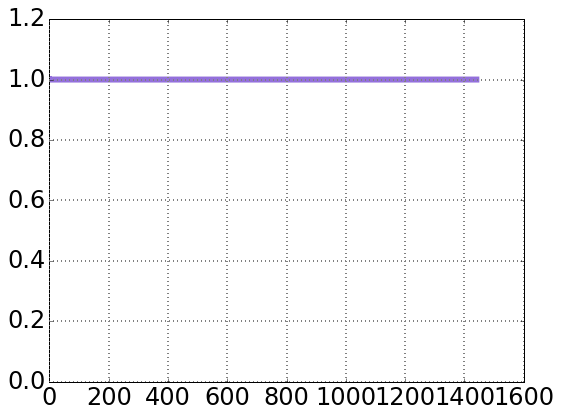

In [11]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/(soln_1_50[:,0]+soln_1_50[:,2])
b1_1=cosa
pylab.ylim([0,1.2])
plot(t,cosa, color = '#9370db', lw=6)
#xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
fig.savefig('Total_A_00_S_50_deg_ratio_entre100koff_SMB.eps',format="eps")
show()

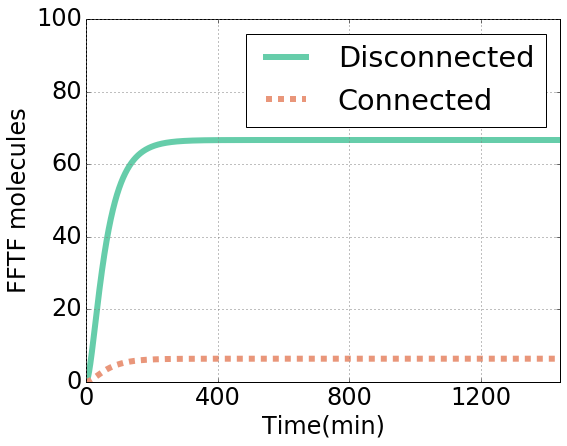

In [12]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
plt.xticks(np.arange(0, 1440, 400.0))
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=6)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=6)


xlabel('Time(min)')
ylabel('FFTF molecules')
grid('on',lw=1, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_zero_00_S_50_deg_entre100koff_monomer_bind_Det_strong_2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


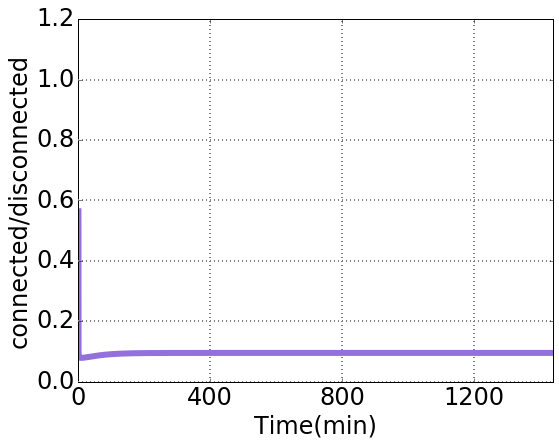

In [13]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,1.2])
f1_1=cosa
plt.xticks(np.arange(0, 1440, 400.0))
plot(t,cosa, color = '#9370db', lw=6)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

fig.savefig('Free_A_00_S_50_deg_ratio_entre100koff_monomer_bind_Det_strong_2.eps',format="eps")
show()

# Total A sin degradación de complejo de A y sitio de pegado

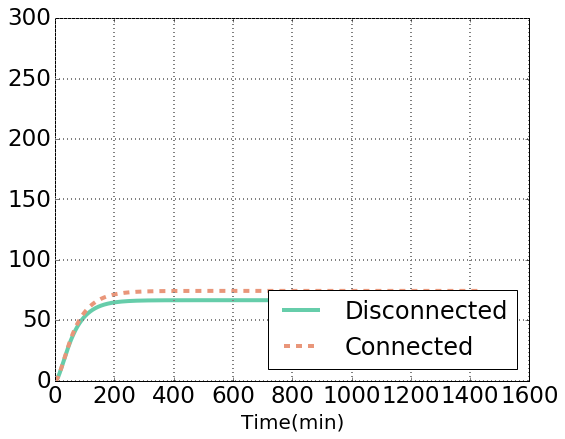

In [14]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;
 
d3=0; 
 

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_non_deg_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


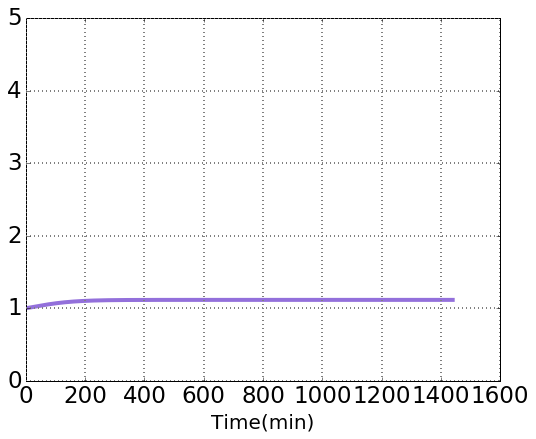

In [15]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_non_deg_retro_complex_ratio.eps',format="eps")
show()

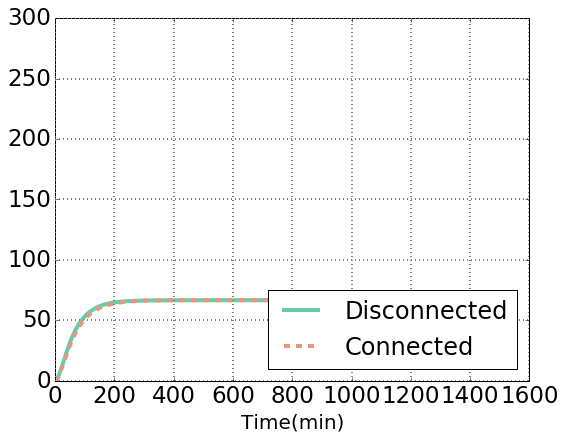

In [16]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_non_deg_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


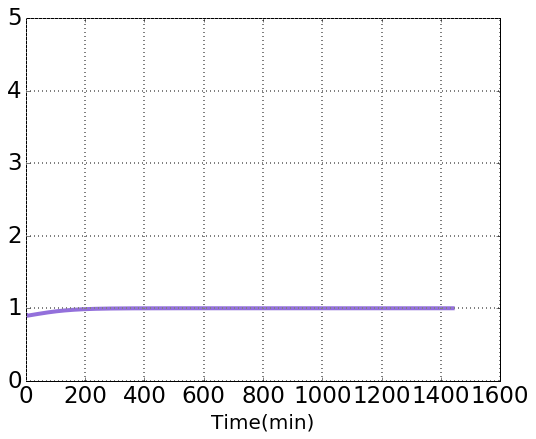

In [17]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_non_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A 100 kon sin degradación de complejo de A con sitio de pegado

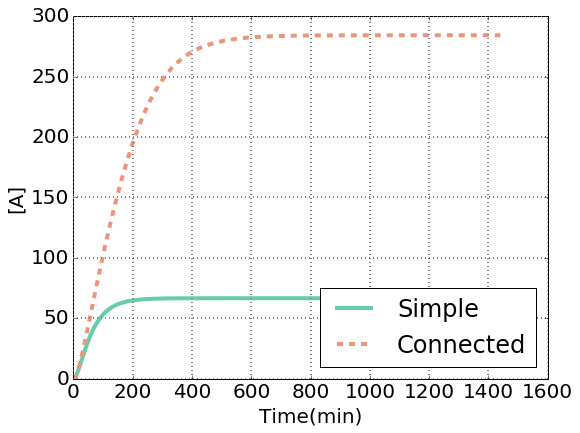

In [18]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;

d3=0;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_non_deg_100_kon_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


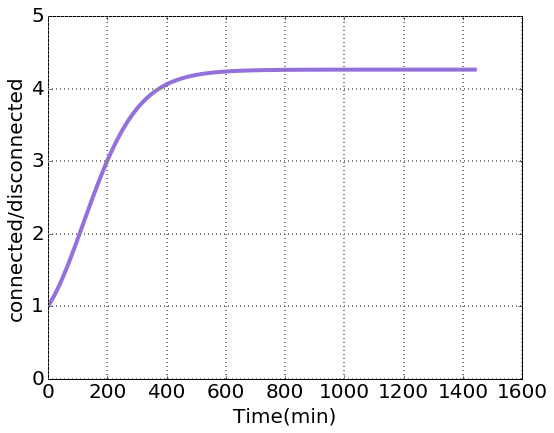

In [19]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_non_deg_retro_100_kon_complex_ratio.eps',format="eps")
show()

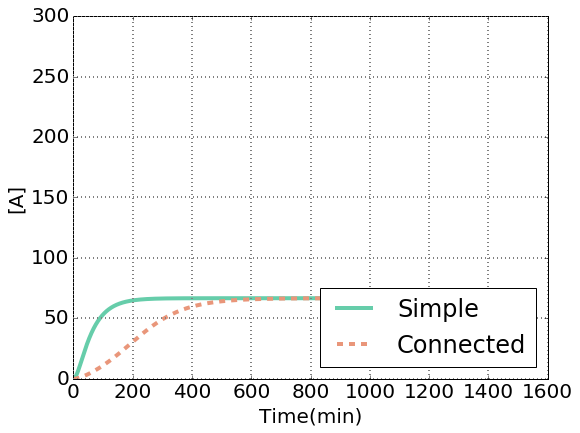

In [20]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_non_deg_100_kon_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


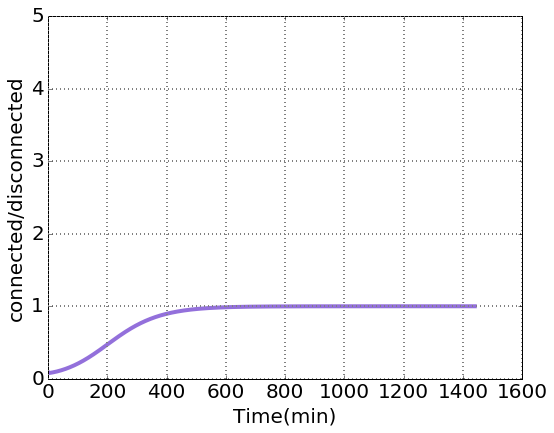

In [21]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_non_deg_retro_100_kon_complex_ratio.eps',format="eps")
show()

In [22]:
size(d2)

1

# Total A koff/100 sin degradación de complejo de A con sitio de pegado

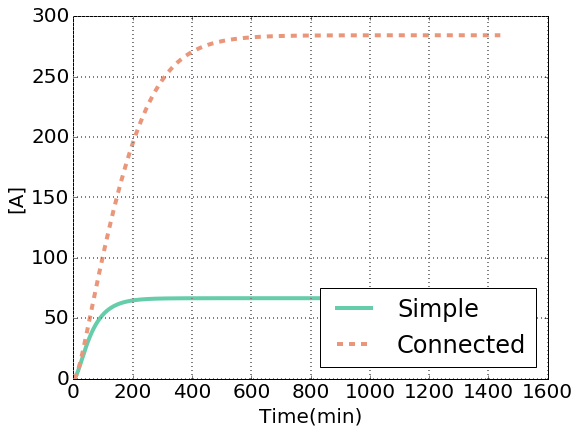

In [23]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60/100;

d3=0;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)


xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_non_deg_100_kon_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


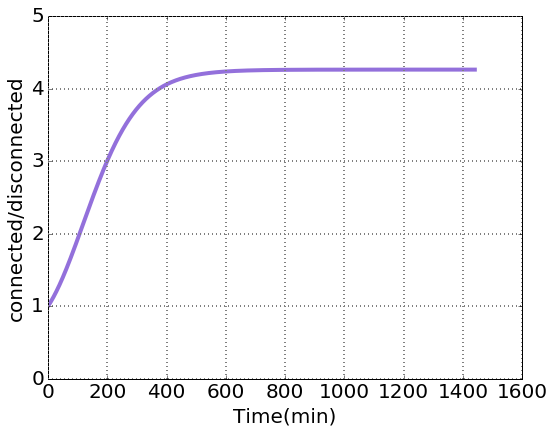

In [24]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_non_deg_retro_entre_100_koff_complex_ratio.eps',format="eps")
show()

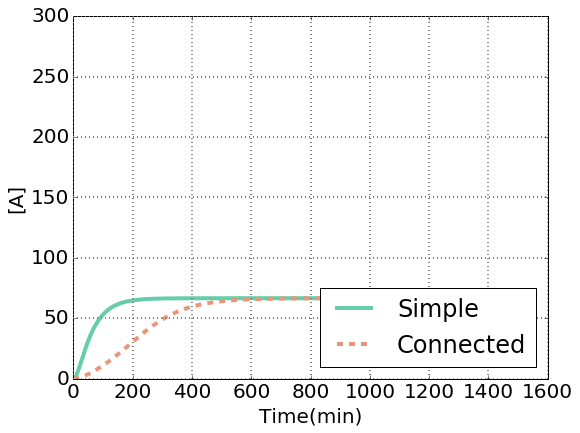

In [25]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_non_deg_entre_100_koff_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


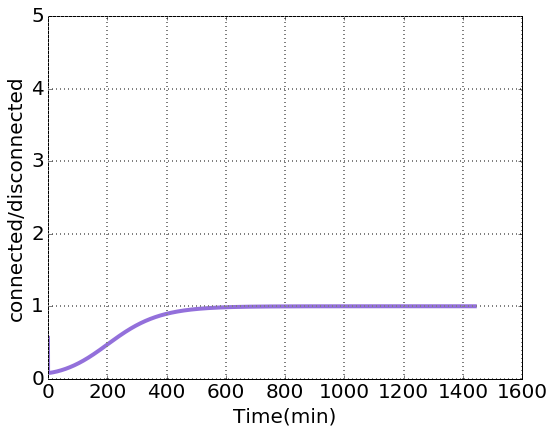

In [26]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_non_deg_retro_entre_100_koff_complex_ratio.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 0.5 de la normal 

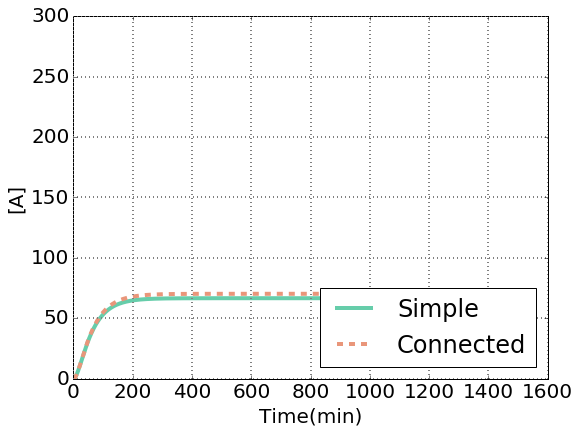

In [27]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;

d3=0.5*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)


xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_05.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


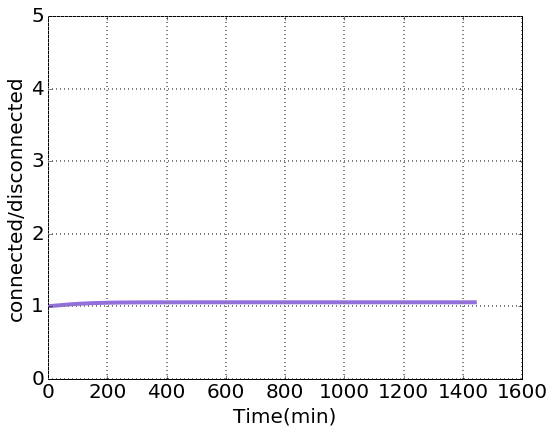

In [28]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_05_deg_retro_complex_ratio.eps',format="eps")
show()

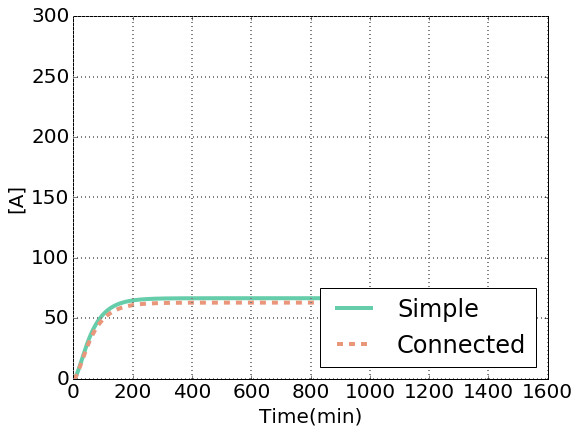

In [29]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_05.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


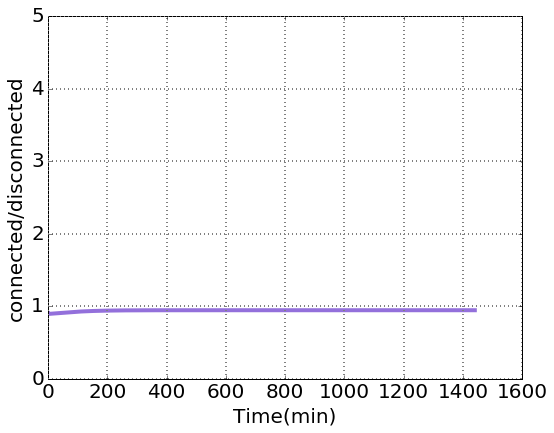

In [30]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_05_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 0.5 de la normal y 100 kon

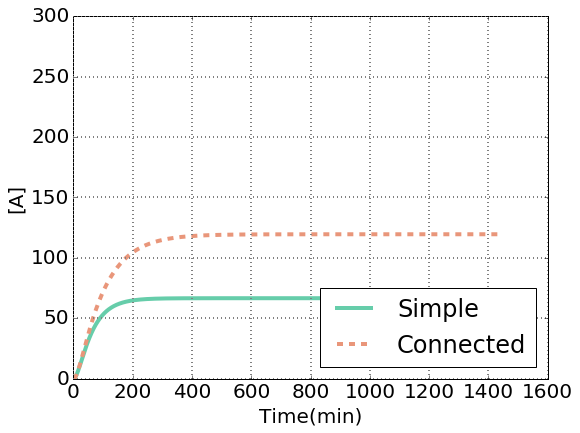

In [31]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;

d3=0.5*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_05_deg_100_kon_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


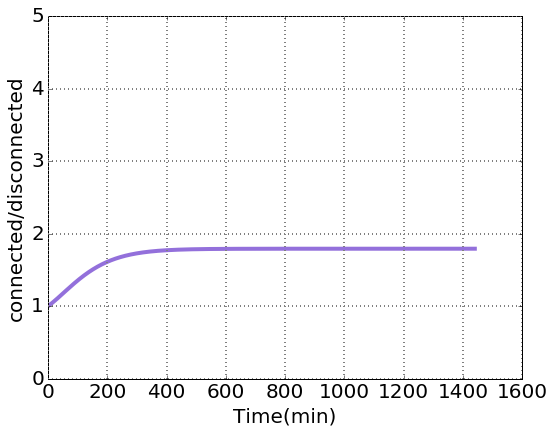

In [32]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_05_deg_100kon_retro_complex_ratio.eps',format="eps")
show()

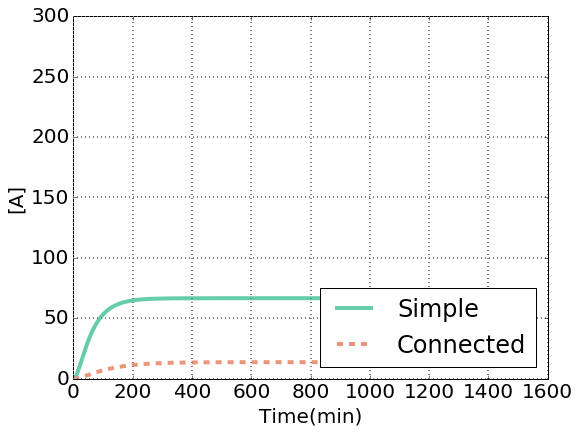

In [33]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_05_deg_100_kon_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


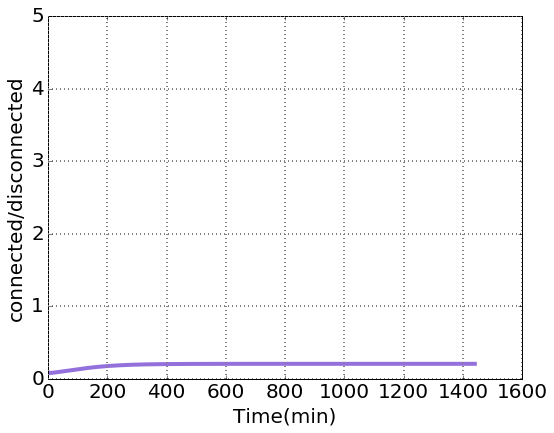

In [34]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_05_deg_100kon_retro_complex_ratio.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 0.5 de la normal y koff/100

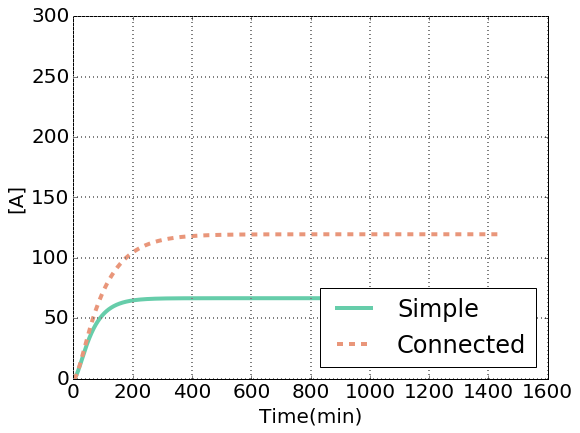

In [35]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60/100;
d3=0.5*d

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_05_deg_entre_100_koff_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


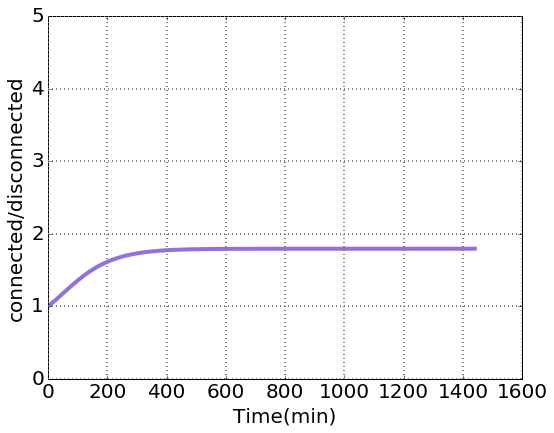

In [36]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_05_deg_entre100koff_retro_complex_ratio.eps',format="eps")
show()

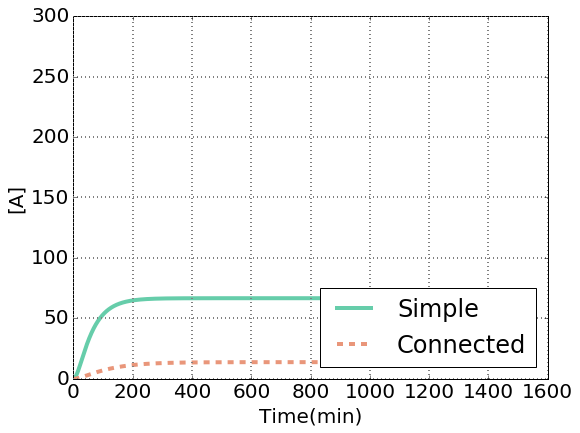

In [37]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_05_deg_entre_100_koff_retrocompl.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


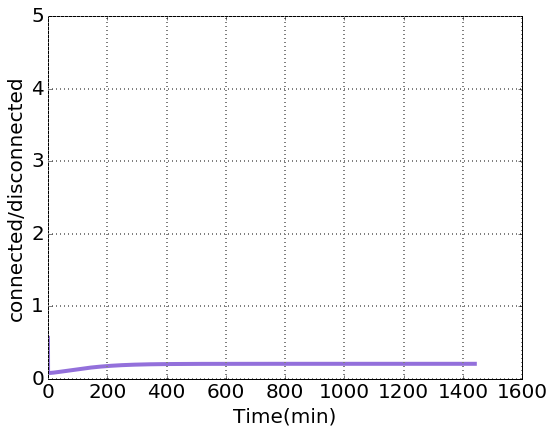

In [38]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_05_deg_entre100koff_retro_complex_ratio.eps',format="eps")
show()

# 

# Total A con degradación de complejo de A de y sitio de pegado 0.25 de la normal 

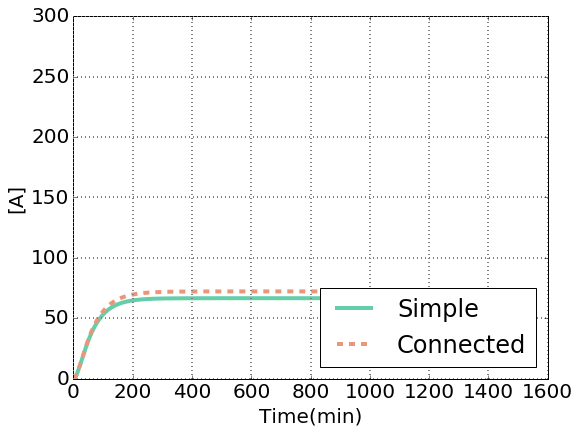

In [39]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); 
koff=30*60;

d3=0.25*d;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_025.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


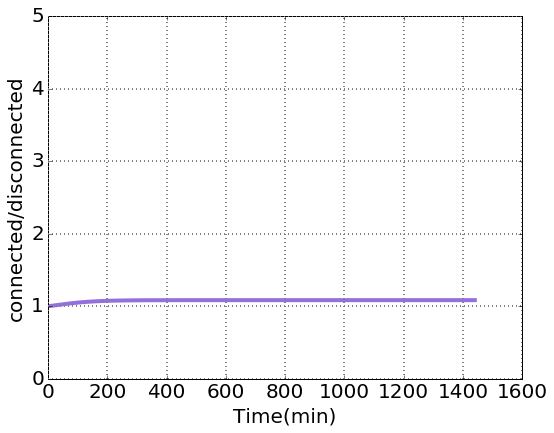

In [40]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_025_deg_retro_complex_ratio.eps',format="eps")
show()

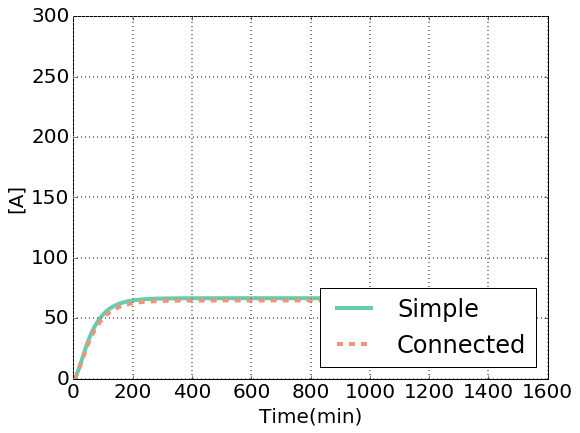

In [41]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_025.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


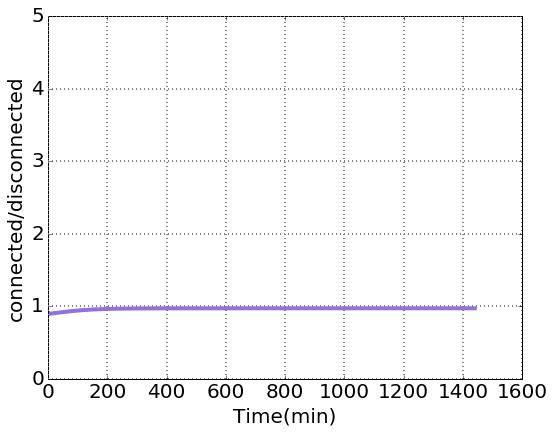

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_025_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 0.25 de la normal y 100 kon

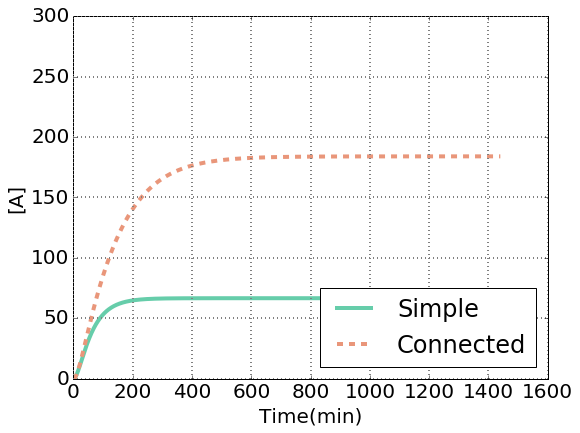

In [43]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *



kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
d3=0.25*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)

ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_025_100_kon.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


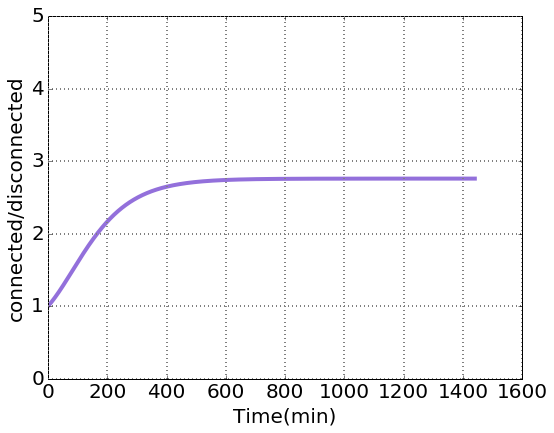

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_025_deg_retro_complex_ratio_kon100.eps',format="eps")
show()

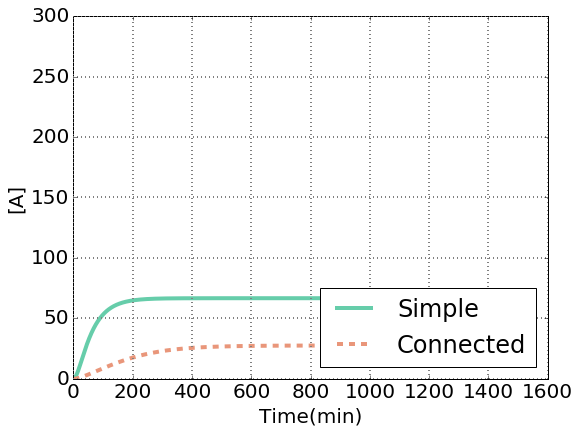

In [45]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_025_100_kon.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


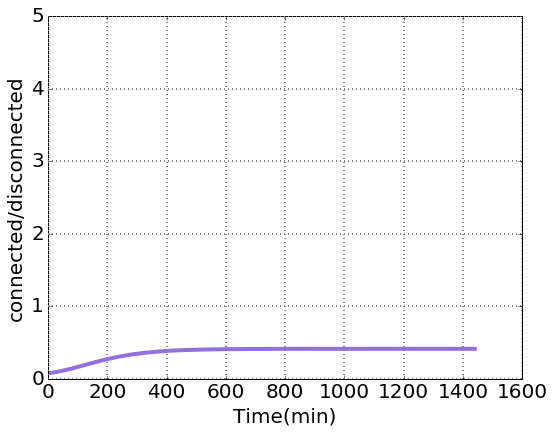

In [46]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_025_deg_retro_complex_ratio_kon100.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 0.25 de la normal y koff/100

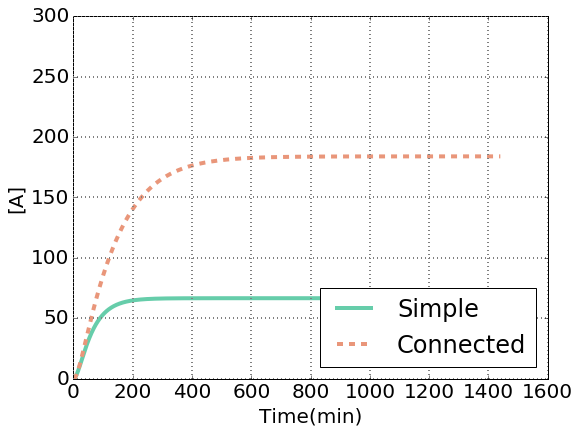

In [47]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
d3=0.25*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_025_entre_100_koff.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


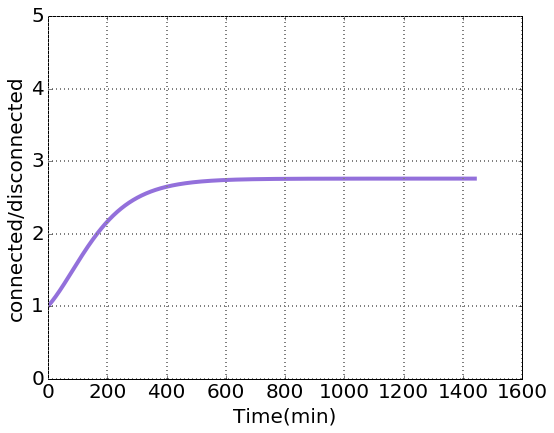

In [48]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_025_deg_retro_complex_ratio_entrekoff100.eps',format="eps")
show()

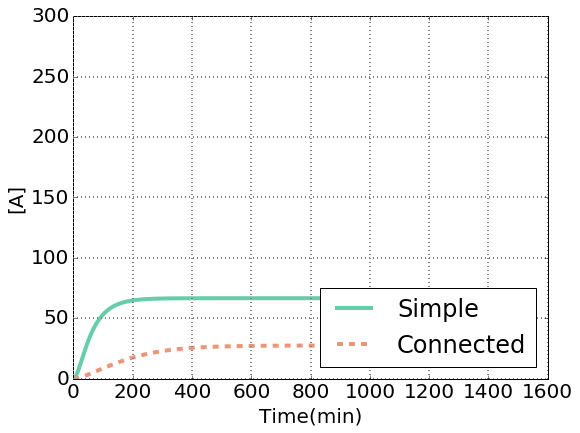

In [49]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_025_entre_100_koff.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


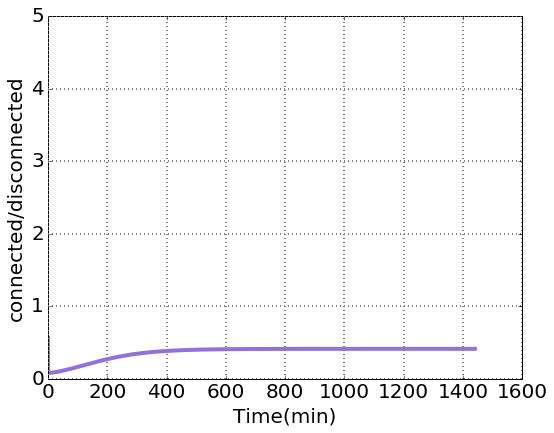

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa= (soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_025_deg_retro_complex_ratio_entrekoff100.eps',format="eps")
show()

# Total A con degradación de complejo de A de y sitio de pegado 2 de la normal 

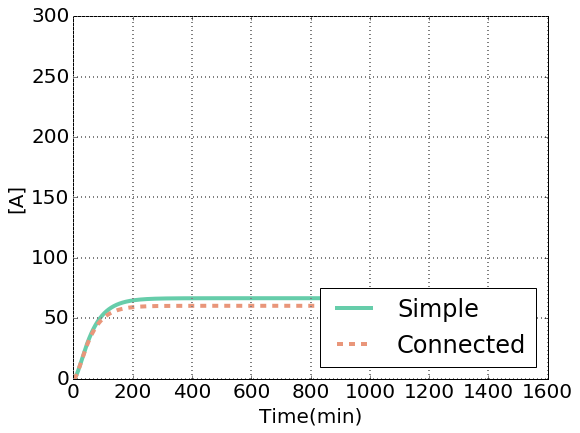

In [51]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;

d3=2*d;

from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


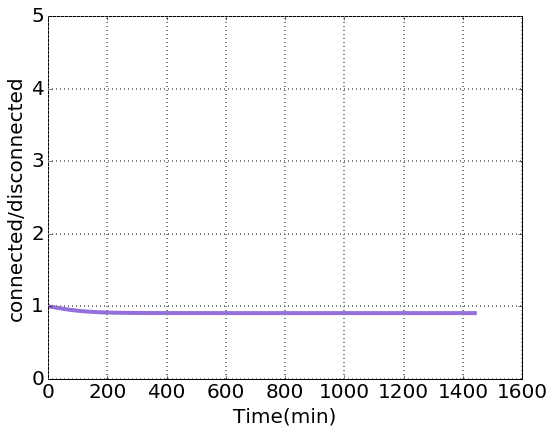

In [52]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
a5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_2_deg_retro_complex_ratio.eps',format="eps")
show()

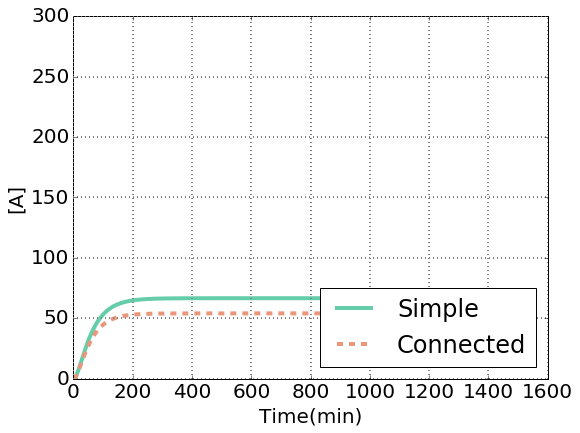

In [53]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_2.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


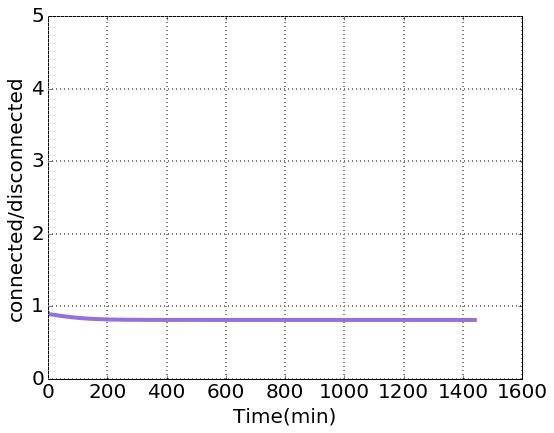

In [54]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/soln_1_50[:,0]
pylab.ylim([0,5])
c5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_2_deg_retro_complex_ratio.eps',format="eps")
show()

# Total A 100 kon con degradación de complejo de A de y sitio de pegado 2 de la normal 

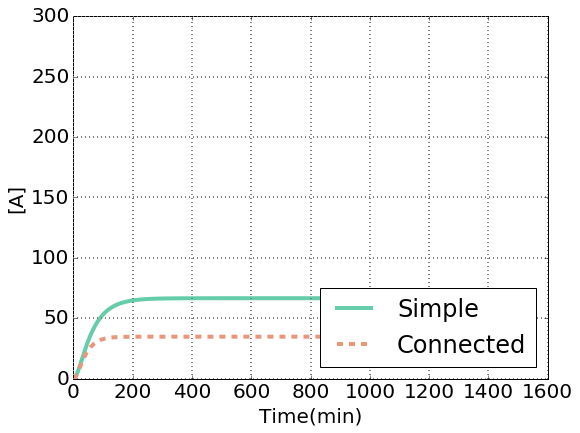

In [55]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
d3=2*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_2_100_kon.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


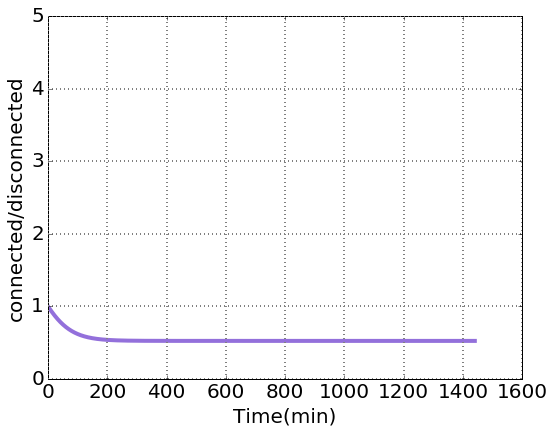

In [56]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_2_deg_retro_complex_ratio_100_kon.eps',format="eps")
show()

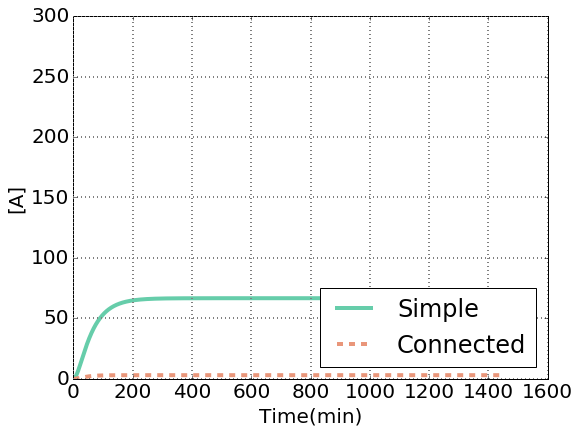

In [57]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_2_100_kon.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


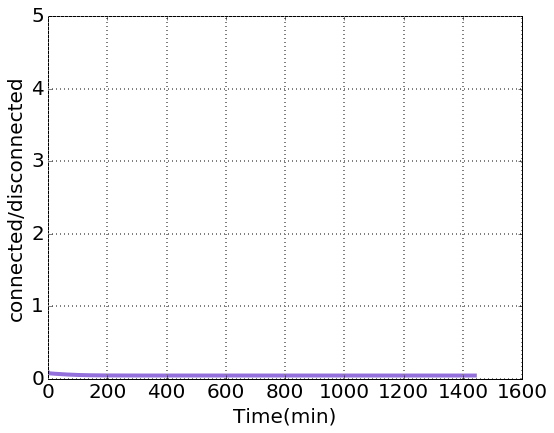

In [58]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_2_deg_retro_complex_ratio_100_kon.eps',format="eps")
show()

# Total A koff/100 con degradación de complejo de A de y sitio de pegado 2 de la normal 

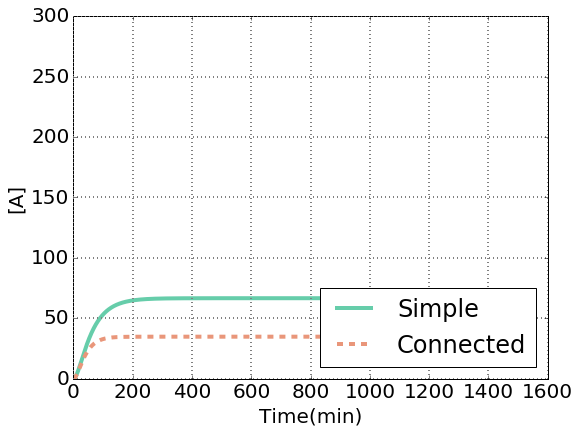

In [59]:
import numpy as np
t=np.arange(0,1440,0.01)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
d3=2*d;


from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
ptot1=0
xo = [0, 0, 0]
def f_1_50(x,t): 
       return (((k2*x[1]))+koff*x[2]-kon*(ptot1-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot1-x[2])*x[0]-d3*x[2])
soln_1_50=odeint(f_1_50,xo,t)

xo = [0, 0, 0]
def f_1R_50(x,t): 
    return (((k2*x[1]))+koff*x[2]-kon*(ptot2-x[2])*x[0]-d*x[0],
            a+k*S-d2*x[1],
            -koff*x[2]+kon*(ptot2-x[2])*x[0]-d3*x[2])
soln_1R_50=odeint(f_1R_50,xo,t)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0]+soln_1R_50[:,2], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Total_A_zero_00_S_50_deg_2_entre_100_koff.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


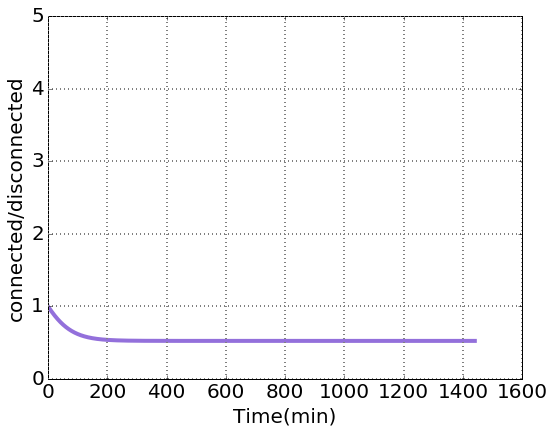

In [60]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0]+soln_1R_50[:,2])/soln_1_50[:,0]
pylab.ylim([0,5])
b5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Total_A_zero_00_S_50_2_deg_retro_complex_ratio_entre_100_koff.eps',format="eps")
show()

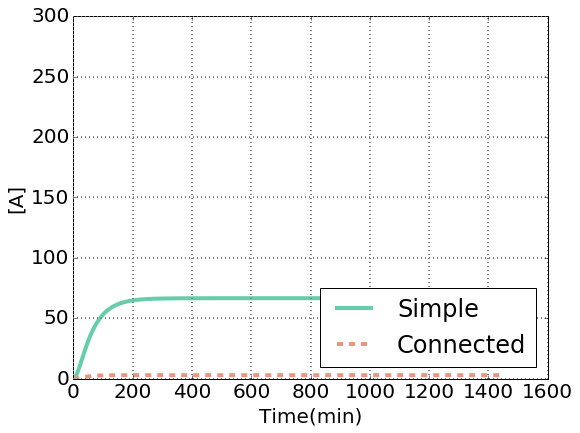

In [61]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln_1_50[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,soln_1R_50[:,0], "--",color = '#e9967a',lw=4)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
#fig.savefig('Free_A_zero_00_S_50_deg_2_entre_100_koff.eps',format="eps")
show()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


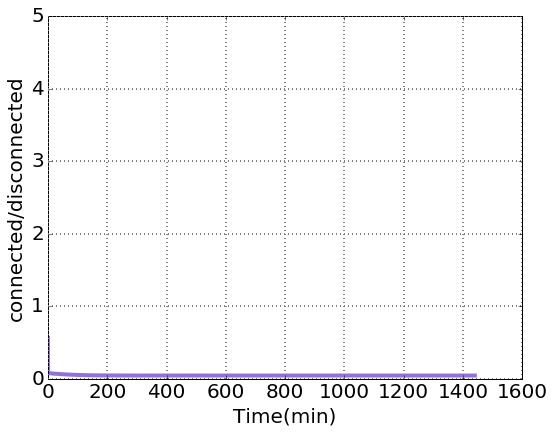

In [62]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(soln_1R_50[:,0])/(soln_1_50[:,0])
pylab.ylim([0,5])
f5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
#fig.savefig('Free_A_zero_00_S_50_2_deg_retro_complex_ratio_entre_100_koff.eps',format="eps")
show()

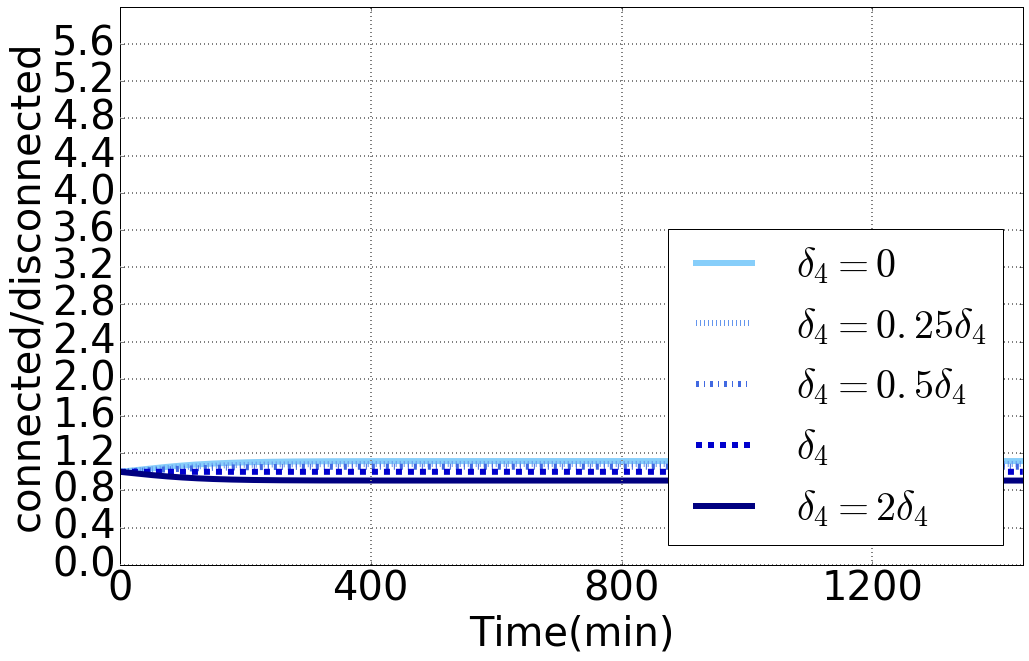

In [63]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)

from pylab import *
import matplotlib.pyplot  as pyplot
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,a2,color = '#87cefa', lw=6)
line2, =plot(t,a4, ":", color = '#6495ed',lw=6)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=6)
line4, =plot(t,a1, "--", color = '#0000cd',lw=6)
line5, =plot(t,a5, color = '#000080',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}
#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_kon_case_one_monomer_weak_SMB.eps',format="eps")
show()

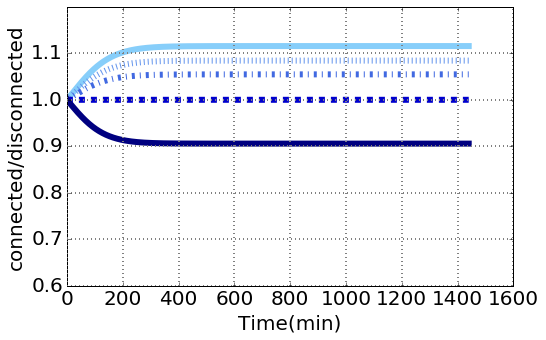

In [64]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=6)
line2, =plot(t,a4, ":", color = '#6495ed',lw=6)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=6)
line4, =plot(t,a1, "--", color = '#0000cd',lw=6)
line5, =plot(t,a5, color = '#000080',lw=6)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Total_A_Mini_ratios_kon_case_one.eps',format="eps")
show()

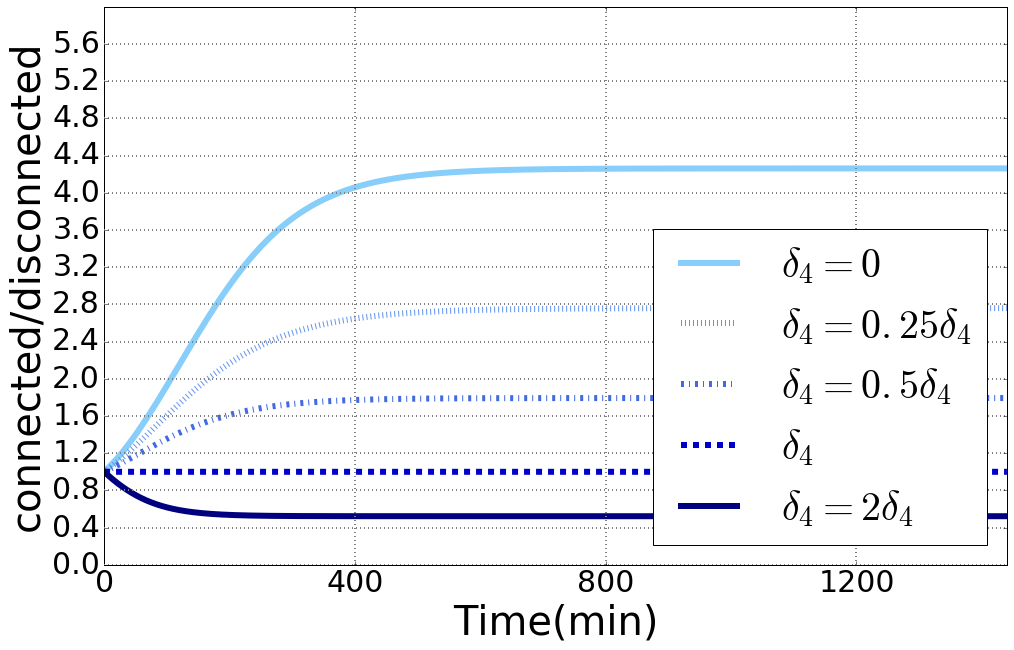

In [65]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,b2,color = '#87cefa', lw=6)
line2, =plot(t,b4, ":", color = '#6495ed',lw=6)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=6)
line4, =plot(t,b1, "--", color = '#0000cd',lw=6)
line5, =plot(t,b5, color = '#000080',lw=6)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", 
                                             "$\delta_4=0.25\delta_4$", 
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_100kon_SMB.eps',format="eps")
show()

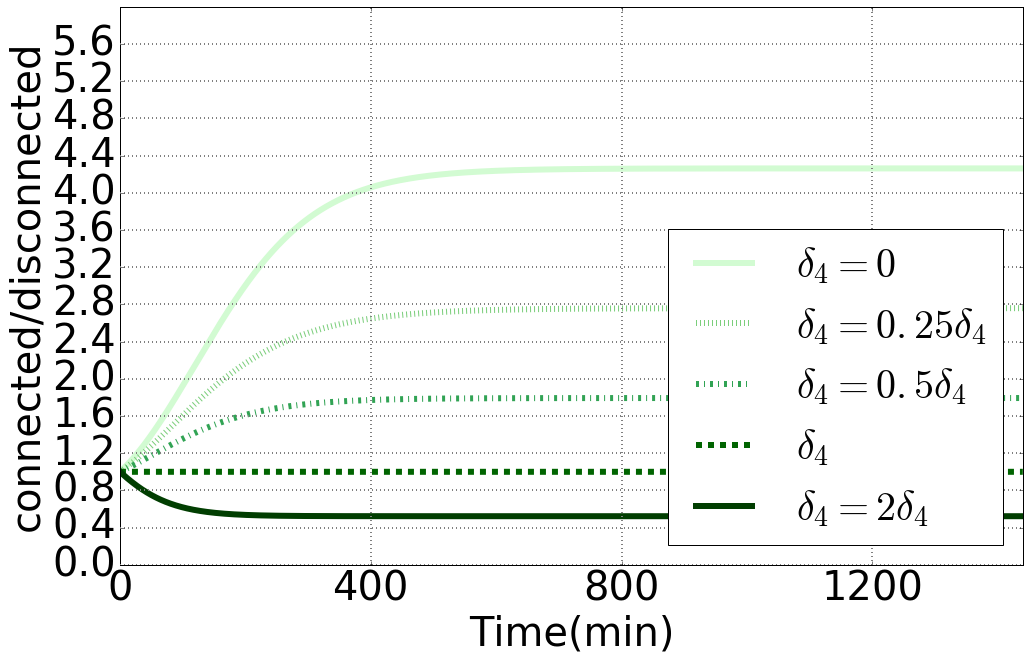

In [66]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 40}


from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,b2_1,color = '#d2fbd2', lw=6)
line2, =plot(t,b4_1, ":", color = '#7bce7b',lw=6)
line3, =plot(t,b3_1, "-.", color = '#31a354', lw=6)
line4, =plot(t,b1_1, "--", color = '#006400',lw=6)
line5, =plot(t,b5_1, color = '#013e01',lw=6)



legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$",
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4, fontsize=40)

xlabel('Time(min)', fontsize=40)
ylabel('connected/disconnected', fontsize=40)
grid('on',lw=2, color="gray")



ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_koff100_SMB.eps',format="eps")
show()

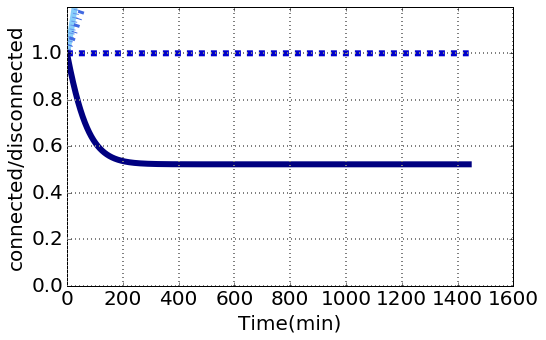

In [67]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=6)
line2, =plot(t,b4, ":", color = '#6495ed',lw=6)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=6)
line4, =plot(t,b1, "--", color = '#0000cd',lw=6)
line5, =plot(t,b5, color = '#000080',lw=6)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Total_A_Miniratios_100kon_case_one.eps',format="eps")
show()

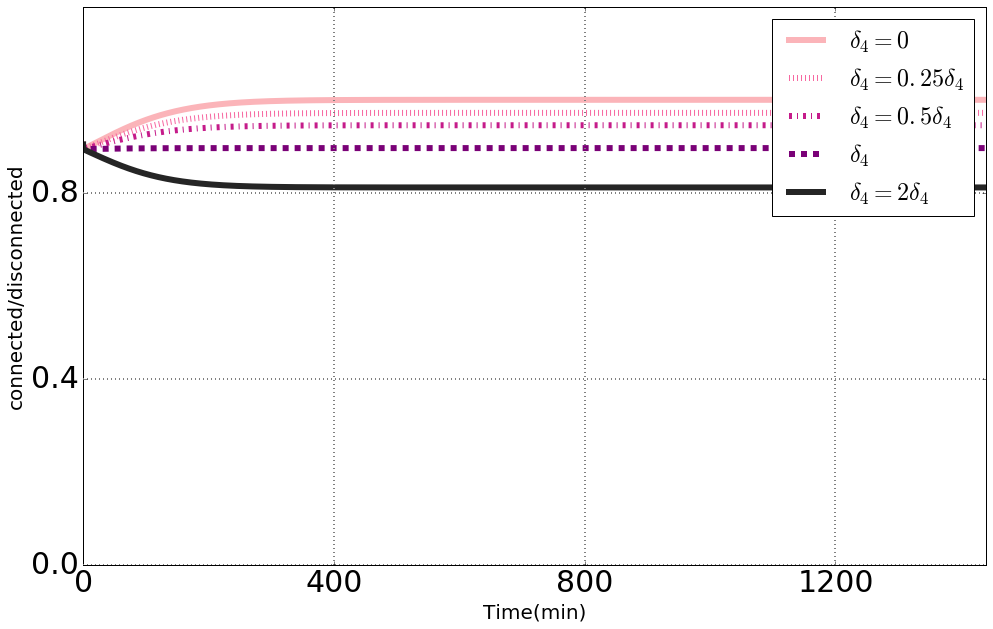

In [68]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,c2,color = '#FBB4B9', lw=6)
line2, =plot(t,c4, ":", color = '#F768A1',lw=6)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,c1, "--", color = '#7A0177',lw=6)
line5, =plot(t,c5, color = '#252525',lw=6)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", 
                                             "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_case_monomer_bind.eps',format="eps")
show()

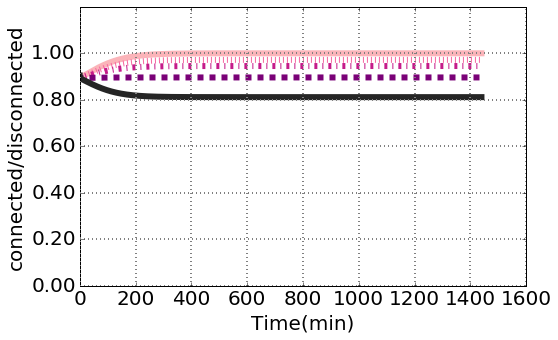

In [69]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)

from pylab import *
import matplotlib.pyplot  as pyplot
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=6)
line2, =plot(t,c4, ":", color = '#F768A1',lw=6)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,c1, "--", color = '#7A0177',lw=6)
line5, =plot(t,c5, color = '#252525',lw=6)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

#fig.savefig('Free_A_Mini_ratios_case_one.eps',format="eps")
show()

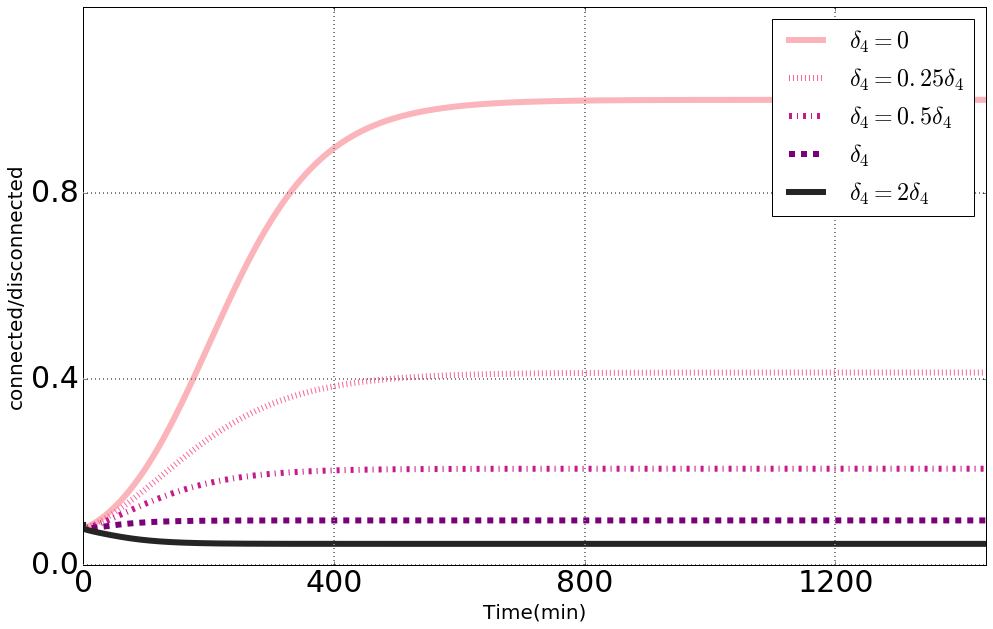

In [70]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)


plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,f2,color = '#FBB4B9', lw=6)
line2, =plot(t,f4, ":", color = '#F768A1',lw=6)
line3, =plot(t,f3, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,f1, "--", color = '#7A0177',lw=6)
line5, =plot(t,f5, color = '#252525',lw=6)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_100kon_case_monomer_bind.eps',format="eps")
show()

In [71]:
size(d2)

1

In [72]:
from matplotlib import lines
lines.lineStyles.keys()


[u'', u' ', u'None', u'--', u'-.', u'-', u':']

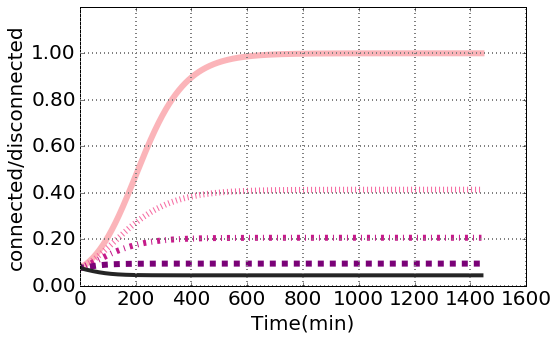

In [73]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

line1, =plot(t,f2,color = '#FBB4B9', lw=6)
line2, =plot(t,f4, ":", color = '#F768A1',lw=6)
line3, =plot(t,f3, "-.", color = '#C51B8A', lw=6)
line4, =plot(t,f1, "--", color = '#7A0177',lw=6)
line5, =plot(t,f5, color = '#252525',lw=4)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

#fig.savefig('Free_A_Mini_ratios_100kon_case_monomer_bind.eps',format="eps")
show()

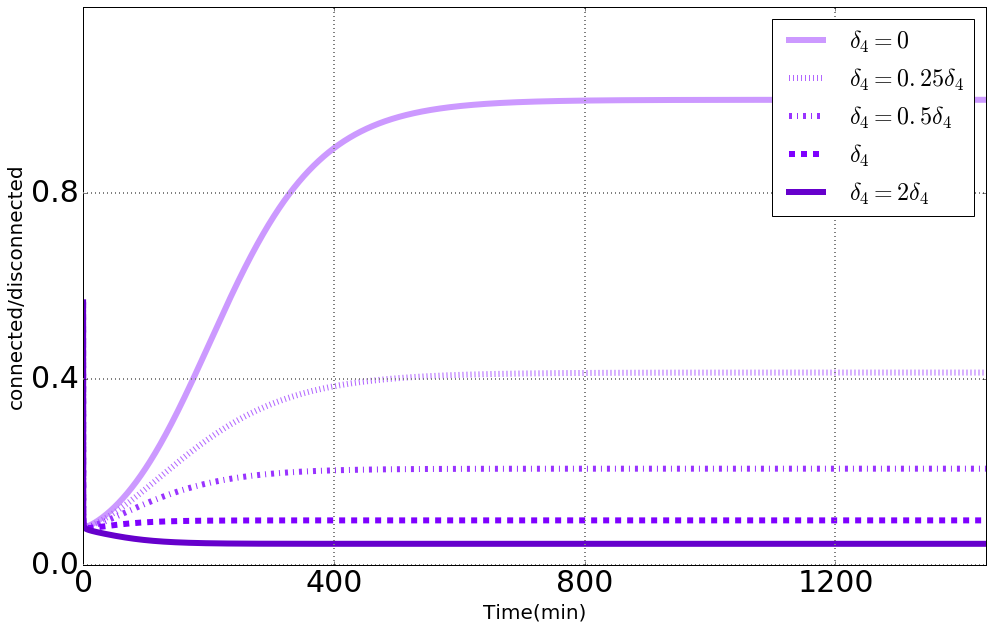

In [74]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

plt.xticks(np.arange(0, 1440, 400.0))
line1, =plot(t,f2_1,color = '#CC99FF', lw=6)
line2, =plot(t,f4_1, ":", color = '#B266FF',lw=6)
line3, =plot(t,f3_1, "-.", color = '#9933FF', lw=6)
line4, =plot(t,f1_1, "--", color = '#7F00FF',lw=6)
line5, =plot(t,f5_1, color = '#6600CC',lw=6)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_koff_entre_1000_case_monomer_bind.eps',format="eps")
show()